In [2]:
import numpy as np
import pandas as pd
import sklearn
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
from sklearn import preprocessing
from sklearn import model_selection
from sklearn.linear_model import LogisticRegression
from sklearn import metrics
import pandas as pd
#import pylab as plb
import matplotlib.pyplot as plt
%matplotlib inline
plt.style.use('ggplot')

# Read the column description and ensure you understand each attribute well

In [7]:
loan_df = pd.read_csv ('C:/Users/Abhishek/Downloads/Bank_Personal_Loan_Modelling-1.csv')

In [8]:
loan_df.head(10)

,ID,Age,Experience,Income,ZIP Code,Family,CCAvg,Education,Mortgage,Personal Loan,Securities Account,CD Account,Online,CreditCard
0,1,25,1,49,91107,4,1.6,1,0,0,1,0,0,0
1,2,45,19,34,90089,3,1.5,1,0,0,1,0,0,0
2,3,39,15,11,94720,1,1.0,1,0,0,0,0,0,0
3,4,35,9,100,94112,1,2.7,2,0,0,0,0,0,0
4,5,35,8,45,91330,4,1.0,2,0,0,0,0,0,1
5,6,37,13,29,92121,4,0.4,2,155,0,0,0,1,0
6,7,53,27,72,91711,2,1.5,2,0,0,0,0,1,0
7,8,50,24,22,93943,1,0.3,3,0,0,0,0,0,1
8,9,35,10,81,90089,3,0.6,2,104,0,0,0,1,0
9,10,34,9,180,93023,1,8.9,3,0,1,0,0,0,0


# Study the data distribution in each attribute, share your findings. (5 points)



# Get the target column distribution. 

In [9]:
loan_df = loan_df.drop(['ID', 'Experience', 'ZIP Code', 'CCAvg'], axis=1)

In [10]:
loan_df.head(5)

,Age,Income,Family,Education,Mortgage,Personal Loan,Securities Account,CD Account,Online,CreditCard
0,25,49,4,1,0,0,1,0,0,0
1,45,34,3,1,0,0,1,0,0,0
2,39,11,1,1,0,0,0,0,0,0
3,35,100,1,2,0,0,0,0,0,0
4,35,45,4,2,0,0,0,0,0,1


In [11]:
loan_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 10 columns):
Age                   5000 non-null int64
Income                5000 non-null int64
Family                5000 non-null int64
Education             5000 non-null int64
Mortgage              5000 non-null int64
Personal Loan         5000 non-null int64
Securities Account    5000 non-null int64
CD Account            5000 non-null int64
Online                5000 non-null int64
CreditCard            5000 non-null int64
dtypes: int64(10)
memory usage: 390.7 KB


In [12]:
loan_df.shape

(5000, 10)

In [13]:
loan_df.describe()

,Age,Income,Family,Education,Mortgage,Personal Loan,Securities Account,CD Account,Online,CreditCard
count,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.00000,5000.000000,5000.000000
mean,45.338400,73.774200,2.396400,1.881000,56.498800,0.096000,0.104400,0.06040,0.596800,0.294000
std,11.463166,46.033729,1.147663,0.839869,101.713802,0.294621,0.305809,0.23825,0.490589,0.455637
min,23.000000,8.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000
25%,35.000000,39.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000
50%,45.000000,64.000000,2.000000,2.000000,0.000000,0.000000,0.000000,0.00000,1.000000,0.000000
75%,55.000000,98.000000,3.000000,3.000000,101.000000,0.000000,0.000000,0.00000,1.000000,1.000000
max,67.000000,224.000000,4.000000,3.000000,635.000000,1.000000,1.000000,1.00000,1.000000,1.000000


In [14]:
loan_df.apply(lambda x: len(x.unique()))

Age                    45
Income                162
Family                  4
Education               3
Mortgage              347
Personal Loan           2
Securities Account      2
CD Account              2
Online                  2
CreditCard              2
dtype: int64

# Lets Visualize the data


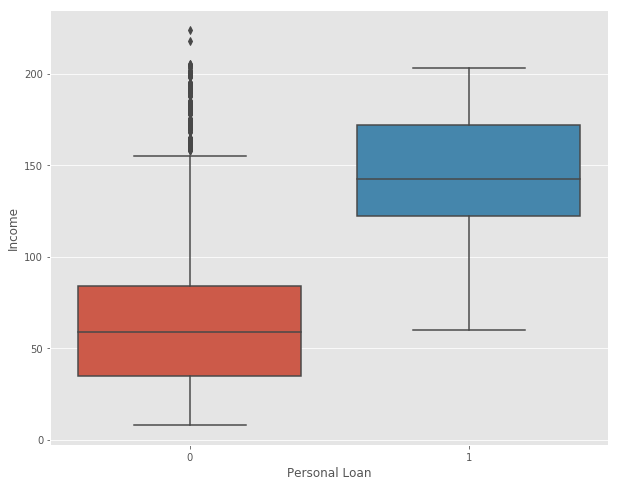

In [17]:
fig, ax = plt.subplots(figsize=(10, 8))

sns.boxplot(loan_df['Personal Loan'], loan_df['Income'])

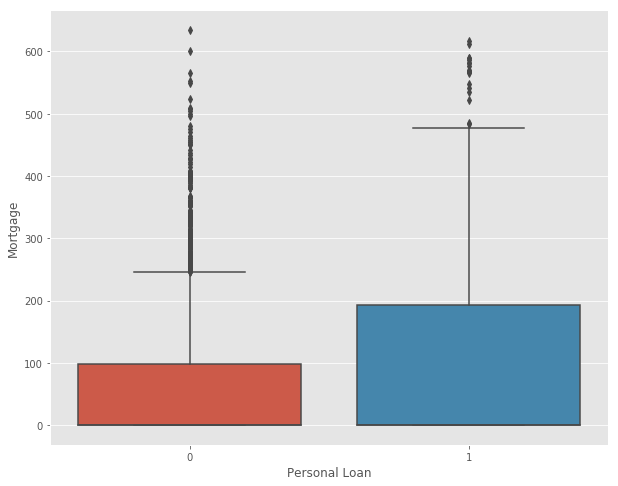

In [18]:
fig, ax = plt.subplots(figsize=(10, 8))

sns.boxplot(loan_df['Personal Loan'], loan_df['Mortgage'])

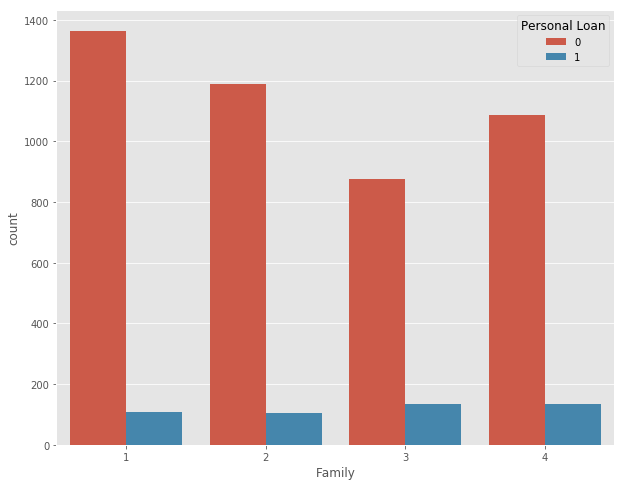

In [20]:
plt.figure(figsize=(10, 8))

sns.countplot(x='Family', data = loan_df, hue = 'Personal Loan')

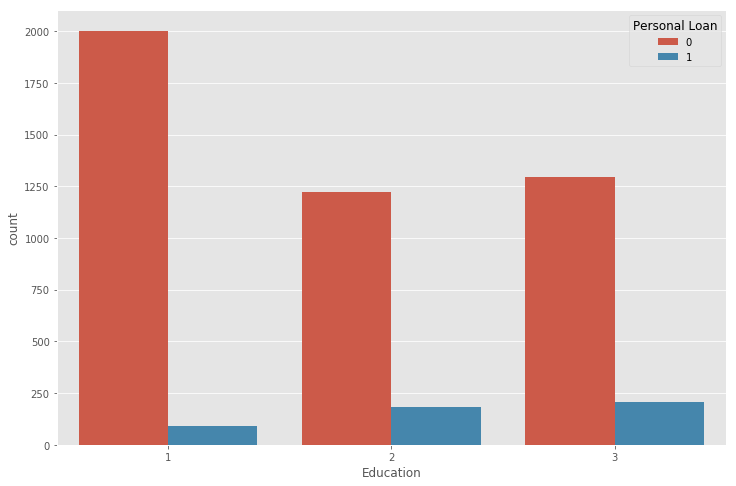

In [21]:
plt.figure(figsize=(12, 8))

sns.countplot(x='Education', data = loan_df, hue='Personal Loan')

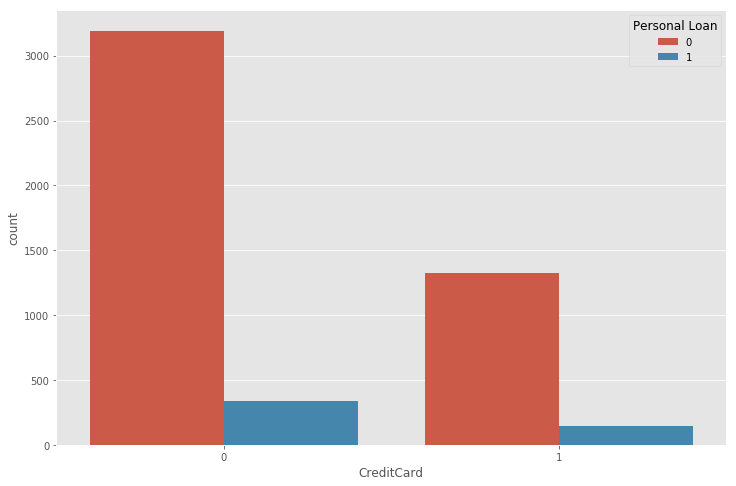

In [25]:
plt.figure(figsize=(12, 8))

sns.countplot(x='CreditCard', data = loan_df, hue='Personal Loan')

In [26]:
pd.crosstab(loan_df['Securities Account'], loan_df['Personal Loan'])

Personal Loan,0,1
Securities Account,,
0,4058,420
1,462,60


In [27]:
loan_df_corr = loan_df.corr()

loan_df_corr

,Age,Income,Family,Education,Mortgage,Personal Loan,Securities Account,CD Account,Online,CreditCard
Age,1.000000,-0.055269,-0.046418,0.041334,-0.012539,-0.007726,-0.000436,0.008043,0.013702,0.007681
Income,-0.055269,1.000000,-0.157501,-0.187524,0.206806,0.502462,-0.002616,0.169738,0.014206,-0.002385
Family,-0.046418,-0.157501,1.000000,0.064929,-0.020445,0.061367,0.019994,0.014110,0.010354,0.011588
Education,0.041334,-0.187524,0.064929,1.000000,-0.033327,0.136722,-0.010812,0.013934,-0.015004,-0.011014
Mortgage,-0.012539,0.206806,-0.020445,-0.033327,1.000000,0.142095,-0.005411,0.089311,-0.005995,-0.007231
Personal Loan,-0.007726,0.502462,0.061367,0.136722,0.142095,1.000000,0.021954,0.316355,0.006278,0.002802
Securities Account,-0.000436,-0.002616,0.019994,-0.010812,-0.005411,0.021954,1.000000,0.317034,0.012627,-0.015028
CD Account,0.008043,0.169738,0.014110,0.013934,0.089311,0.316355,0.317034,1.000000,0.175880,0.278644
Online,0.013702,0.014206,0.010354,-0.015004,-0.005995,0.006278,0.012627,0.175880,1.000000,0.004210
CreditCard,0.007681,-0.002385,0.011588,-0.011014,-0.007231,0.002802,-0.015028,0.278644,0.004210,1.000000


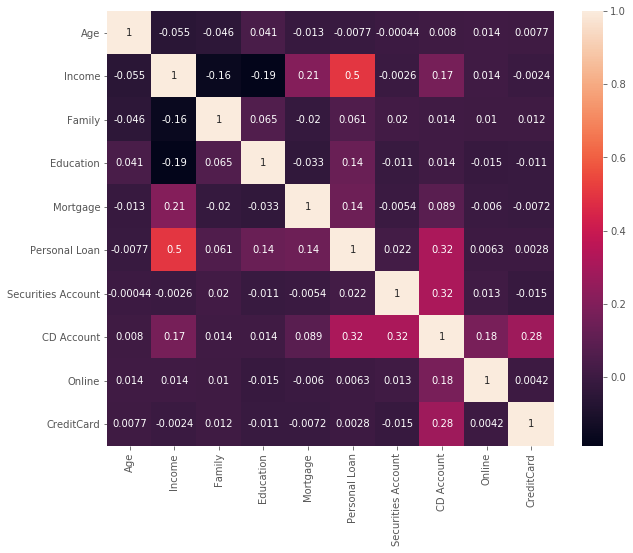

In [28]:
plt.figure(figsize=(10, 8))

sns.heatmap(loan_df_corr, annot=True)

# 4. Split the data into training and test set in the ratio of 70:30 respectively


# 5. Use different classification models (Logistic, K-NN and Naïve Bayes) to predict the likelihood of a liability customer buying personal loans (15 points)


# 6. Print the confusion matrix for all the above models (5 points)

In [30]:
X = loan_df.drop('Personal Loan', axis=1)

Y = loan_df['Personal Loan']

In [31]:
X.head()

,Age,Income,Family,Education,Mortgage,Securities Account,CD Account,Online,CreditCard
0,25,49,4,1,0,1,0,0,0
1,45,34,3,1,0,1,0,0,0
2,39,11,1,1,0,0,0,0,0
3,35,100,1,2,0,0,0,0,0
4,35,45,4,2,0,0,0,0,1


In [32]:
Y.head()

0    0
1    0
2    0
3    0
4    0
Name: Personal Loan, dtype: int64

In [33]:
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size=0.3)

In [34]:
x_train.shape, y_train.shape

((3500, 9), (3500,))

In [35]:
x_test.shape, y_test.shape

((1500, 9), (1500,))

# Logistic Test

In [36]:
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB

from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report, confusion_matrix

In [37]:
model=LogisticRegression(penalty='l2', max_iter=1000)

In [38]:
model.fit(x_train, y_train)

C:\Users\Abhishek\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=1000,
                   multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=None, solver='warn', tol=0.0001, verbose=0,
                   warm_start=False)

In [39]:
prediction=model.predict(x_test)

In [40]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test, prediction)

0.952

In [41]:
prediction

array([0, 0, 0, ..., 0, 0, 0], dtype=int64)

# confusion matrix for logistics

In [42]:
from sklearn.metrics import confusion_matrix
confusion_matrix = confusion_matrix(y_test, prediction)
print(confusion_matrix)

[[1345   19]
 [  53   83]]



# KNN Test

In [46]:
from sklearn.preprocessing import StandardScaler  
scaler = StandardScaler()  
scaler.fit(x_train)

X_train = scaler.transform(x_train)  
X_test = scaler.transform(x_test) 

In [47]:
from sklearn.preprocessing import StandardScaler 

In [48]:
from sklearn.neighbors import KNeighborsClassifier  
classifier = KNeighborsClassifier(n_neighbors=5)  
classifier.fit(X_train, y_train) 

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=5, p=2,
                     weights='uniform')

In [49]:
y_pred = classifier.predict(X_test)  

In [50]:
y_pred

array([0, 0, 0, ..., 0, 0, 0], dtype=int64)

In [51]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test, y_pred)

0.966

In [52]:
y_pred1=pd.DataFrame(y_pred)

In [53]:
compare_df = pd.concat([y_pred1.reset_index(drop=True), y_test.reset_index(drop=True)], axis=1)

In [54]:
compare_df

,0,Personal Loan
0,0,0
1,0,0
2,0,0
3,0,0
4,0,0
5,0,0
6,0,0
7,0,0
8,0,0
9,0,0


# Confusion matrix for K-NN

In [55]:
from sklearn.metrics import classification_report, confusion_matrix  
print(confusion_matrix(y_test, y_pred))  
print(classification_report(y_test, y_pred)) 

[[1361    3]
 [  48   88]]
              precision    recall  f1-score   support

           0       0.97      1.00      0.98      1364
           1       0.97      0.65      0.78       136

    accuracy                           0.97      1500
   macro avg       0.97      0.82      0.88      1500
weighted avg       0.97      0.97      0.96      1500



# Naïve Bayes

In [63]:
loan_gnb = GaussianNB()

In [64]:
loan_gnb.fit(X_train, y_train)

GaussianNB(priors=None, var_smoothing=1e-09)

In [68]:
y_pred_GNB = loan_gnb.predict(X_test)

In [69]:
print("Accuracy:",metrics.accuracy_score(y_test, y_pred_GNB))

Accuracy: 0.918


# Confusion matrix for Naïve Bayes

In [71]:
confusion_matrix = confusion_matrix(y_test, y_pred_GNB)
print(confusion_matrix)

[[1304   60]
 [  63   73]]


# Question 7 :  Give your reasoning on which is the best model in this case and why it performs better? (5 points)

# After analysing the model accuracy & "confusion matrix" : KNN is much better because it has lesser number of FN False negative value which could have been lead to loss of business